<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Exercise%20-%20Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-08-05 12:23:26--  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.117.128, 173.194.202.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.117.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.02s   

2020-08-05 12:23:26 (282 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



##Hyperparameters

In [2]:

embedding_dim =20 
max_length = 150
vocab_size = 1500
training_portion = .7
trunc_type = 'post'
padding_type = 'post'
oov_tok ='<OOV>' 


##Data Preprocessing 
Here, I've a list of words which will be neglected during tokenization.

In [3]:
sentences = []
labels = []
ignored_words = ["a", "am", "an", "about", "above", "after", "again", "against", "all", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(ignored_words))


153


In [4]:
with open("/tmp/bbc-text.csv", 'r') as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in ignored_words:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

    
print(len(labels))
print(len(sentences))
print(sentences[1])


2225
2225
worldcom boss  left books alone  former worldcom boss bernie ebbers  accused overseeing $11bn (£5.8bn) fraud  never made accounting decisions  witness told jurors.  david myers made comments questioning defence lawyers arguing mr ebbers not responsible worldcom s problems. phone company collapsed 2002 prosecutors claim losses hidden protect firm s shares. mr myers already pleaded guilty fraud assisting prosecutors.  monday  defence lawyer reid weingarten tried distance client allegations. cross examination  asked mr myers ever knew mr ebbers  make accounting decision  .  not aware   mr myers replied.  ever know mr ebbers make accounting entry worldcom books   mr weingarten pressed.  no   replied witness. mr myers admitted ordered false accounting entries request former worldcom chief financial officer scott sullivan. defence lawyers trying paint mr sullivan  admitted fraud will testify later trial  mastermind behind worldcom s accounting house cards.  mr ebbers  team  meanwhi

In [5]:
train_size = int(len(sentences) * training_portion )# according to hyperparameters

train_sentences = sentences[: train_size] 
train_labels = labels[: train_size] 
validation_sentences = sentences[train_size: ]
validation_labels = labels[train_size: ]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))


1557
1557
1557
668
668


In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded =pad_sequences(train_sequences, maxlen=max_length, padding=padding_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))



449
150
200
150
192
150


In [7]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded =pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type)

print(len(validation_sequences))
print(validation_padded.shape)


668
(668, 150)


In [8]:
label_tokenizer =Tokenizer()
label_tokenizer.fit_on_texts(labels)
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq =np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)



[4]
[2]
[1]
(1557, 1)
[1]
[1]
[5]
(668, 1)


In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 150, 20)           30000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               5376      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 1542      
Total params: 36,918
Trainable params: 36,918
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 15
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/15
49/49 - 0s - loss: 1.7009 - accuracy: 0.2845 - val_loss: 1.6265 - val_accuracy: 0.3144
Epoch 2/15
49/49 - 0s - loss: 1.5726 - accuracy: 0.3995 - val_loss: 1.5134 - val_accuracy: 0.4311
Epoch 3/15
49/49 - 0s - loss: 1.4384 - accuracy: 0.4541 - val_loss: 1.3589 - val_accuracy: 0.5225
Epoch 4/15
49/49 - 0s - loss: 1.2456 - accuracy: 0.5626 - val_loss: 1.1584 - val_accuracy: 0.7021
Epoch 5/15
49/49 - 0s - loss: 1.0286 - accuracy: 0.7502 - val_loss: 0.9531 - val_accuracy: 0.8174
Epoch 6/15
49/49 - 0s - loss: 0.8012 - accuracy: 0.8703 - val_loss: 0.7391 - val_accuracy: 0.8757
Epoch 7/15
49/49 - 0s - loss: 0.5901 - accuracy: 0.9184 - val_loss: 0.5584 - val_accuracy: 0.8982
Epoch 8/15
49/49 - 0s - loss: 0.4226 - accuracy: 0.9396 - val_loss: 0.4230 - val_accuracy: 0.9117
Epoch 9/15
49/49 - 0s - loss: 0.3045 - accuracy: 0.9550 - val_loss: 0.3329 - val_accuracy: 0.9296
Epoch 10/15
49/49 - 0s - loss: 0.2228 - accuracy: 0.9640 - val_loss: 0.2692 - val_accuracy: 0.9401
Epoch 11/15
49/49 -

#Plotting Epochs vs Accuracy/Loss graph

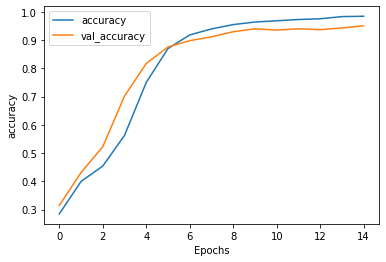

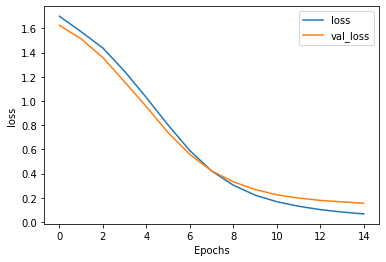

In [16]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")